### import libraries and platforms

In [1]:
# python 3.9
#pip 20.2.4

In [2]:
# trafile 2020.10.1
import tarfile

#pandas 1.1.3
import pandas as pd

# requests 2.24.0
import re

# tensorflow 2.4
import tensorflow as tf
from tensorflow import keras

#nltk 3.5
import nltk
from nltk.corpus import stopwords

#matplotlip 3.3.2
import matplotlib.pyplot as plt
# numpy 1.19.5
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros

# keras 2.4.3
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer

#sklearn 0.23.2
from sklearn.model_selection import train_test_split


C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

### 3)  Read the data 

In [5]:
# READ THE CSV FILE
movie_reviews = pd.read_csv("./IMDB Dataset.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

In [6]:
#sample of the data
movie_reviews.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [7]:
#showing 3 reviews
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

## preproccessing data

In [8]:
#cleaning data 

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [9]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [10]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [11]:
#3rd review example before preproccessing
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [12]:
#3rd review example after preproccessing
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [13]:
y = movie_reviews['sentiment']

# when review is positive make it =1 , when it is negative make it =0
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

# splitting data

In [14]:
#Splitting data train:70% validation:10% test: 20%
X_train, y_train = X[:35000],  y[:35000]
X_val,y_val= X[35000:40000], y[35000:40000] 
X_test , y_test =X[40000:50000], y[40000:50000]

### tokenizing  data

In [15]:
#extract tokens from the text the number of tokens is 5000
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [16]:
# convert the text to a numeric sequence 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

In [17]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

print('Found %s unique tokens.' % vocab_size)

Found 87377 unique tokens.


maxlen: Optional Int, maximum length of all sequences. If not provided,  sequences will be padded to the length of the longest individual sequence.
padding: 'post'means the pad is after each sequence.

In [18]:
#max length of sequence

maxlen = 256
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

Vectors for representing words are generally called embeddings, because the word is embedded in a particular vector space.

In [19]:
# importing the dictionary of words 'glove.6B.200d'

embeddings_dictionary = dict()
glove_file = open('./glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [20]:
embedding_matrix = zeros((vocab_size, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# building the model

- Layer 1, LSTM(128), reads the input data and outputs 128 features with 2 timesteps for each because return_sequences=True.
 - Setting the return_sequences=True makes each cell per timestep emit a signal.
 
- Layer 2, LSTM(32), takes the 3x128 input from Layer 1 and reduces the feature size to 32. 

In [21]:

# Initialising the RNN
model = Sequential()
embedding_layer = Embedding(vocab_size, 200,
                            weights=[embedding_matrix],
                            input_length=maxlen ,
                            trainable=False)
model.add(embedding_layer)
#first LSTM layer
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
#second LSTM layer
model.add(LSTM(32))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
#activation is sigmoid 
model.add(Dense(1, activation='sigmoid'))
#optimizer is Adam
#compile and fit the model 
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics=['acc'])   

In [22]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 200)          17475400  
_________________________________________________________________
lstm (LSTM)                  (None, 256, 128)          168448    
_________________________________________________________________
dropout (Dropout)            (None, 256, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 17,664,489
Trainable params: 189,089
Non-trainable params: 17,475,400
______________________________________

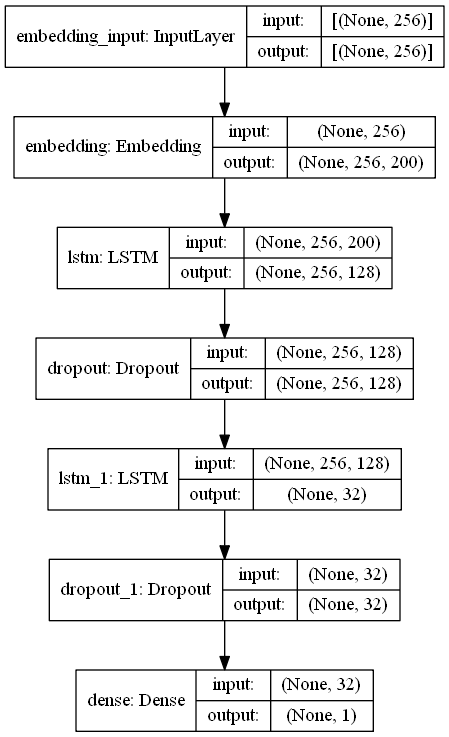

In [24]:
from keras.utils.vis_utils import plot_model

plot_model(model,
           to_file='model_plot.png',
           show_shapes=True, 
           show_layer_names=True)

## training

In [23]:
trained_model=model.fit(X_train, y_train, batch_size=140, epochs=16, verbose=1,  validation_data=(X_val, y_val) ,   shuffle=False)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/16
140/140 [==============================] - 285s 2s/step - loss: 0.2455 - acc: 0.5408 - val_loss: 0.2312 - val_acc: 0.6308
Epoch 2/16
140/140 [==============================] - 291s 2s/step - loss: 0.2413 - acc: 0.5709 - val_loss: 0.2469 - val_acc: 0.5354
Epoch 3/16
140/140 [==============================] - 297s 2s/step - loss: 0.2467 - acc: 0.5292 - val_loss: 0.2486 - val_acc: 0.5072
Epoch 4/16
140/140 [==============================] - 307s 2s/step - loss: 0.2430 - acc: 0.5502 - val_loss: 0.1850 - val_acc: 0.7610
Epoch 5/16
140/140 [==============================] - 310s 2s/step - loss: 0.2405 - acc: 0.6174 - val_loss: 0.2495 - val_acc: 0.5110
Epoch 6/16
140/140 [==============================] - 311s 2s/step - loss: 0.2499 - acc: 0.5114 - val_loss: 0.2486 - val_acc: 0.5174
Epoch 7/16
140/140 [==============================] - 312s 2s/step - loss: 0.2469 - acc: 0.5275 - val_loss: 0.2480 - val_acc: 0.5388
Epoch 8/16
140/140 [==============================] - 315s 2s/step - 

# Confusion Matrix

In [37]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


In [39]:
from sklearn.metrics import confusion_matrix

cm =confusion_matrix(y_pred, y_test)
cm

array([[4647,  942],
       [ 346, 4065]], dtype=int64)

# F1 Score

The formula for the standard F1-score is the harmonic mean of the precision and recall. A perfect model has an F-score of 1.


In [43]:
from sklearn.metrics import f1_score
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))

F1-score: 0.863240603100446


the accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined. 
- Accuracy = (TP + TN)/(TP + TN + FP + FN)


# Test score and accuracy

In [44]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.10300113260746002
Test Accuracy: 0.8712000250816345


# Validation score and accuracy

In [45]:
score_val= model.evaluate(X_val, y_val, verbose=1)
print("Validation Score:", score_val[0])
print("Validation Accuracy:", score_val[1])

157/157 [==============================] - 10s 61ms/step - loss: 0.1022 - acc: 0.8720
Validation Score: 0.10218996554613113
Validation Accuracy: 0.871999979019165


# Model accuracy and loss for training and testing 

loss:  Mean Square Error (MSE) is the most commonly used regression loss function. MSE is the sum of squared distances between our target variable and predicted values.

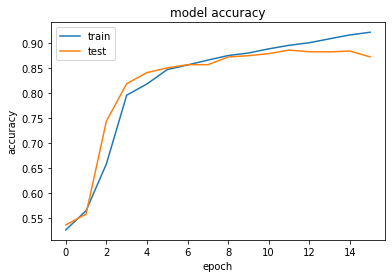

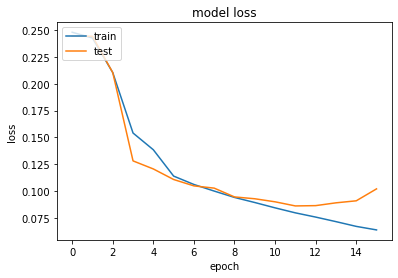

In [46]:

import matplotlib.pyplot as plt
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Model plot
### - showing layers input and output dimentions

### finally we can save the model in h5 format

In [25]:
model.save('model-lstm-sentiment-movie.h5')

--------------------------------------------------------------------------------------------------------------------------------

In [28]:
print("Nour Ammar y2013 140008")
print("Deep learning 2021 Prof.Haluk Gumuskaya")

Nour Ammar y2013 140008
Deep learning 2021 Prof.Haluk Gumuskaya
